<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:

def heuristic(a, b, heuristic_type="manhattan"):
    if heuristic_type == "manhattan":
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    elif heuristic_type == "euclidean":
        return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def get_neighbors(node, grid, allow_diagonal=False):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    if allow_diagonal:
        directions += [(1, 1), (-1, 1), (1, -1), (-1, -1)]

    neighbors = []
    for d in directions:
        neighbor = (node[0] + d[0], node[1] + d[1])
        if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
            if grid[neighbor[0], neighbor[1]] == 0:  # No obstacle
                neighbors.append(neighbor)
    return neighbors

In [3]:
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    return path[::-1]

In [4]:
def a_star(grid, start, goal, heuristic_type="manhattan", allow_diagonal=False):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal, heuristic_type)}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, grid, allow_diagonal):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score.get(neighbor, float("inf")):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal, heuristic_type)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return []

In [5]:
def bfs(grid, start, goal):
    queue = deque([start])
    came_from = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, grid):
            if neighbor not in came_from:
                came_from[neighbor] = current
                queue.append(neighbor)
    return []

In [6]:
def uniform_cost_search(grid, start, goal):
    pq = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}

    while pq:
        current_cost, current = heapq.heappop(pq)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, grid):
            new_cost = current_cost + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                came_from[neighbor] = current
                heapq.heappush(pq, (new_cost, neighbor))
    return []

In [7]:
def plot_path(grid, path, start, goal, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='gray_r')

    for node in path:
        plt.scatter(node[1], node[0], color='red', s=20)

    plt.scatter(start[1], start[0], color='blue', label='Start', s=100)
    plt.scatter(goal[1], goal[0], color='green', label='Goal', s=100)
    plt.legend()
    plt.title(title)
    plt.show()

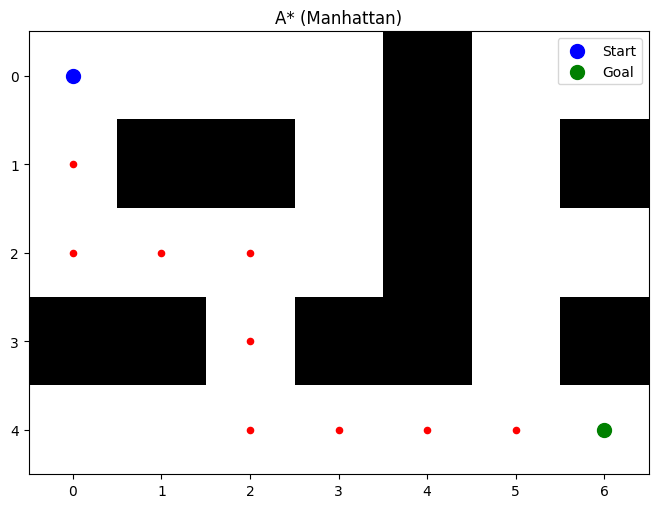

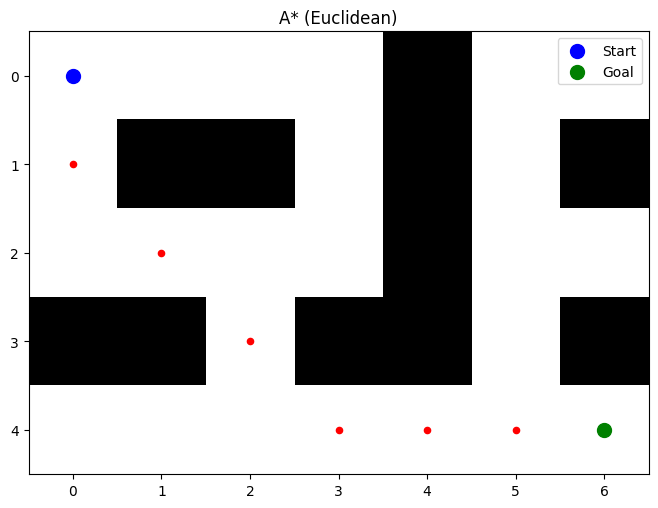

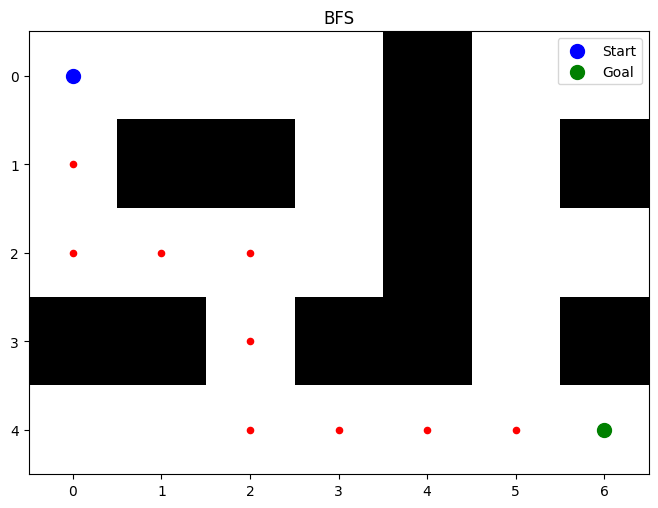

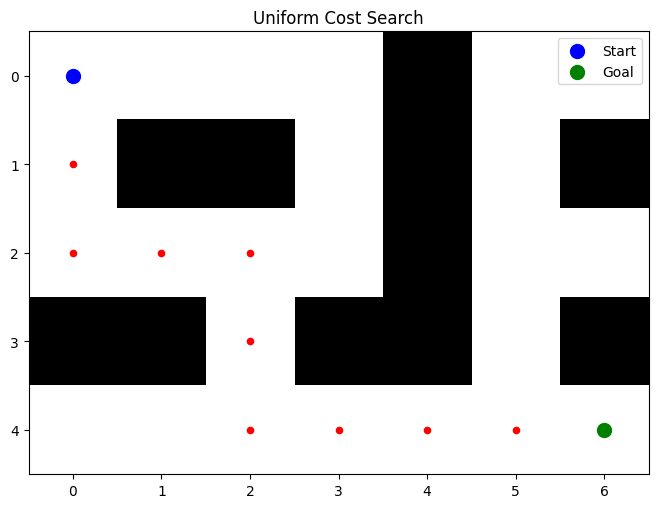

In [9]:
# Grid definition (0: free, 1: obstacle)
grid = np.array([
    [0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 6)

path_a_star_manhattan = a_star(grid, start, goal, "manhattan", False)
path_a_star_euclidean = a_star(grid, start, goal, "euclidean", True)
path_bfs = bfs(grid, start, goal)
path_ucs = uniform_cost_search(grid, start, goal)

plot_path(grid, path_a_star_manhattan, start, goal, "A* (Manhattan)")
plot_path(grid, path_a_star_euclidean, start, goal, "A* (Euclidean)")
plot_path(grid, path_bfs, start, goal, "BFS")
plot_path(grid, path_ucs, start, goal, "Uniform Cost Search")